In [36]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/dhawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df = pd.read_csv("yelp.csv")


In [64]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,wife took birthday breakfast excellent. weathe...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,idea people give bad reviews place. goes show ...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love gyro plate. rice good also dig candy sele...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"rosie, dakota, love chaparral dog park!!! conv...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello good egg!!! go d...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"quiessence is, simply put, beautiful. full win...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop drive here. ate go back next day more. fo...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"luckily, didn't travel far make connecting fli...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,"definitely come happy hour! prices amazing, sa...",review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,nobuo shows unique talents everything menu. ca...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


### Coversion in lower case ###

In [38]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [39]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(len(stop))
stop=stop[0:144]
# print(stop)

In [40]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df

In [41]:
texts = df['text']
# texts
stars = df['stars']
# stars

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

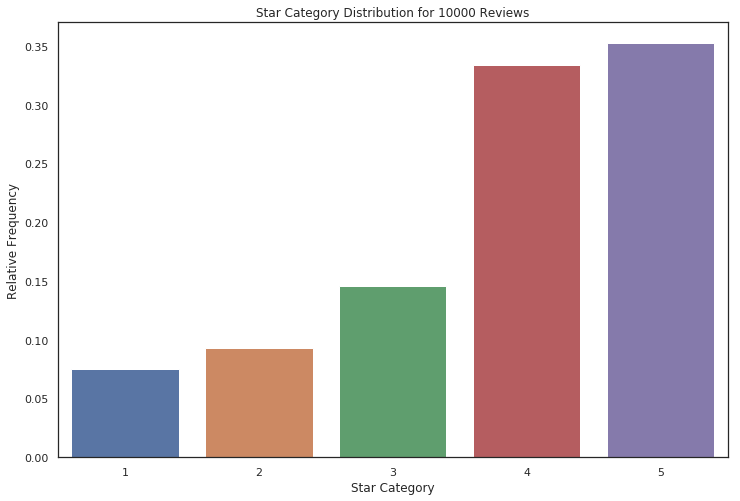

In [42]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df.stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df)));

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

In [43]:
def balance_classes(xs, ys):
    
    freqs = Counter(ys)

    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [44]:
print(Counter(stars))
balanced_x, balanced_y = balance_classes(texts, stars)
print(Counter(balanced_y))

Counter({4: 3526, 5: 3337, 3: 1461, 2: 927, 1: 749})
Counter({5: 749, 4: 749, 2: 749, 3: 749, 1: 749})


### TF-IDF ###


In [45]:
#This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(balanced_x)

In [46]:
# print(vectors)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)

In [48]:
# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [49]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

[1, 3, 3, 1, 2, 1, 1, 4, 5, 4]
[2, 4, 3, 4, 2, 1, 4, 4, 5, 3]


In [50]:
print(accuracy_score(y_test, preds))

0.5040453074433657


In [51]:
confusion_matrix(y_test, preds)

array([[176,  42,  13,   5,  10],
       [ 75,  87,  45,  23,  13],
       [ 33,  46,  93,  54,  28],
       [ 15,   9,  37,  97,  96],
       [ 12,   6,  13,  38, 170]])

In [63]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

Iteration 1, loss = 1.64605316
Iteration 2, loss = 1.64185051
Iteration 3, loss = 1.63717835
Iteration 4, loss = 1.63304370
Iteration 5, loss = 1.62926111
Iteration 6, loss = 1.62612568
Iteration 7, loss = 1.62356870
Iteration 8, loss = 1.62132250
Iteration 9, loss = 1.61935563
Iteration 10, loss = 1.61789118
Iteration 11, loss = 1.61655506
Iteration 12, loss = 1.61540047
Iteration 13, loss = 1.61447451
Iteration 14, loss = 1.61367776
Iteration 15, loss = 1.61293396
Iteration 16, loss = 1.61238387
Iteration 17, loss = 1.61190951
Iteration 18, loss = 1.61150947
Iteration 19, loss = 1.61114049
Iteration 20, loss = 1.61086923
Iteration 21, loss = 1.61056933
Iteration 22, loss = 1.61039727
Iteration 23, loss = 1.61018539
Iteration 24, loss = 1.61004890
Iteration 25, loss = 1.60990289
Iteration 26, loss = 1.60980111
Iteration 27, loss = 1.60970155
Iteration 28, loss = 1.60960661
Iteration 29, loss = 1.60956336
Iteration 30, loss = 1.60947176
Iteration 31, loss = 1.60942113
Iteration 32, los

Iteration 253, loss = 1.60617829
Iteration 254, loss = 1.60614581
Iteration 255, loss = 1.60613232
Iteration 256, loss = 1.60610504
Iteration 257, loss = 1.60609965
Iteration 258, loss = 1.60606732
Iteration 259, loss = 1.60604420
Iteration 260, loss = 1.60602519
Iteration 261, loss = 1.60600569
Iteration 262, loss = 1.60597421
Iteration 263, loss = 1.60594843
Iteration 264, loss = 1.60593248
Iteration 265, loss = 1.60592681
Iteration 266, loss = 1.60589054
Iteration 267, loss = 1.60586995
Iteration 268, loss = 1.60584926
Iteration 269, loss = 1.60583330
Iteration 270, loss = 1.60580339
Iteration 271, loss = 1.60577978
Iteration 272, loss = 1.60575729
Iteration 273, loss = 1.60573301
Iteration 274, loss = 1.60571313
Iteration 275, loss = 1.60570298
Iteration 276, loss = 1.60567340
Iteration 277, loss = 1.60564392
Iteration 278, loss = 1.60562671
Iteration 279, loss = 1.60560826
Iteration 280, loss = 1.60558245
Iteration 281, loss = 1.60555747
Iteration 282, loss = 1.60553387
Iteration 

/home/dhawal/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
print(accuracy_score(y_test, y_pred2)*100)

19.336569579288028


In [53]:
# print(preds)

In [54]:
# import numpy as np
# from sklearn.naive_bayes import GaussianNB
# clf_pf = GaussianNB()
# clf_pf.partial_fit(X_train, y_train)
# GaussianNB(priors=None, var_smoothing=1e-09)
# print(clf_pf.predict(X_test))

In [60]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_test1=clf.predict(X_test)


In [61]:
y_test

[2,
 4,
 3,
 4,
 2,
 1,
 4,
 4,
 5,
 3,
 1,
 3,
 3,
 3,
 5,
 2,
 5,
 1,
 5,
 3,
 2,
 4,
 3,
 1,
 4,
 5,
 4,
 5,
 3,
 3,
 2,
 3,
 4,
 1,
 5,
 1,
 1,
 2,
 3,
 1,
 1,
 5,
 5,
 3,
 5,
 2,
 2,
 4,
 2,
 2,
 4,
 5,
 3,
 5,
 1,
 3,
 1,
 5,
 3,
 3,
 5,
 2,
 4,
 3,
 2,
 1,
 5,
 2,
 1,
 3,
 1,
 1,
 4,
 1,
 4,
 3,
 1,
 3,
 5,
 5,
 4,
 5,
 1,
 4,
 2,
 1,
 1,
 1,
 5,
 3,
 2,
 2,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 1,
 5,
 3,
 3,
 2,
 4,
 3,
 5,
 2,
 1,
 5,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 2,
 2,
 4,
 3,
 4,
 3,
 4,
 4,
 5,
 5,
 1,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 4,
 2,
 4,
 4,
 2,
 5,
 4,
 3,
 5,
 4,
 3,
 3,
 1,
 2,
 4,
 3,
 1,
 4,
 3,
 3,
 4,
 1,
 5,
 2,
 5,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 4,
 2,
 2,
 1,
 2,
 3,
 2,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 5,
 3,
 5,
 3,
 3,
 5,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 5,
 2,
 4,
 2,
 2,
 1,
 1,
 4,
 4,
 1,
 3,
 2,
 3,
 2,
 4,
 2,
 5,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 4,
 2,
 3,
 3,
 5,
 4,
 5,
 4,
 5,
 4,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 4,
 1,
 4,
 3,


In [62]:
print(accuracy_score(y_test, y_test1)*100)

50.0


In [73]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
predicted= model.predict(X_test.toarray())

In [77]:
print(accuracy_score(y_test, predicted)*100)

33.33333333333333
